# Process optimization by genetic algorithm

job j1~j5 are non-sequencial
load is a hour  needed to finish each job
number in row x>=3 is count of jobs

how can we assign jobs to each person to minimize total time span while keeping each persons time limit.


In [1]:
include("../../src/ProcGA.jl")

Main.ProcGA

In [2]:
using CSV,DelimitedFiles
using DataFrames,Missings
using Statistics

In [3]:
using Plots

In [4]:
gr()

Plots.GRBackend()

## reading data

In [5]:
ptbl = CSV.read("proctable.csv",header = 1);

In [6]:
mtbl = convert(Array, ptbl[1:2])

10×2 Array{Any,2}:
 "v1"  50
 "v2"  50
 "v3"  50
 "v4"  50
 "v5"  50
 "h1"  50
 "h2"  50
 "h3"  50
 "h4"  50
 "h5"  50

In [7]:
ptbl2 = [coalesce.(x,0) for x in convert(Array, ptbl[3:end])]

10×14 Array{Int64,2}:
 1  0  0  0  0  0  3  0  2  0  0  2  2  2
 1  0  0  0  0  0  3  0  2  0  0  2  2  2
 1  0  0  0  0  0  3  0  2  0  0  2  2  2
 1  0  0  0  0  0  3  0  2  0  0  2  2  2
 1  0  0  0  0  0  3  0  2  0  0  2  2  2
 1  3  0  0  1  0  3  0  0  2  2  2  0  2
 1  3  0  0  1  0  3  0  0  2  2  2  0  2
 1  3  0  0  1  0  3  0  0  2  2  2  0  2
 1  3  0  0  1  0  3  0  0  2  2  2  0  2
 1  3  0  0  1  0  3  0  0  2  2  2  0  2

In [8]:
s = string.(names(ptbl)[3:end])

14-element Array{String,1}:
 "pipecut"           
 "anneal_bs_prebend" 
 "anneal_ns_prebend" 
 "icing"             
 "rotbend"           
 "pressbend"         
 "anneal_bs_precalib"
 "anneal_ns_precalib"
 "vcalib"            
 "hcalib"            
 "buff_precut"       
 "mc_cut"            
 "buff_postcut"      
 "qc_check"          

In [9]:
nametable = DataFrame(id = 1:length(s), nm = s)

,id,nm
1,1,pipecut
2,2,anneal_bs_prebend
3,3,anneal_ns_prebend
4,4,icing
5,5,rotbend
6,6,pressbend
7,7,anneal_bs_precalib
8,8,anneal_ns_precalib
9,9,vcalib
10,10,hcalib


Read grouping info.

In [10]:
gtbl = readdlm("grouping.csv",',', skipstart = 1)

2×5 Array{Any,2}:
 "anneal_bs"  "[2;7]"  300  3  1
 "anneal_ns"  "[3;8]"  300  3  1

In [11]:
gtbl2=[]
for k in 1:size(gtbl)[1]
    x = gtbl[k, 2:end]
    push!(gtbl2,Dict(:id=>eval(Meta.parse(x[1])),:cnt=>x[2],:timespan=>x[3],:grp=>x[4]))
end

In [12]:
gtbl2

2-element Array{Any,1}:
 Dict{Symbol,Any}(:timespan=>3,:id=>[2, 7],:cnt=>300,:grp=>1)
 Dict{Symbol,Any}(:timespan=>3,:id=>[3, 8],:cnt=>300,:grp=>1)

## Initialize ProcGA tables.

In [47]:
ProcGA.settable(ptbl2, gtbl2, mtbl)

()

## Initialize population

In [64]:
savedfile = "bestprc_heuristics.csv"

"bestprc_heuristics.csv"

In [81]:
# create population from savedfile or make new
g1 = ProcGA.jobtablebase()
if isfile(savedfile)
    println("read from $savedfile")
    gbs = readdlm(savedfile, ',', Int)
    if size(gbs)[2] < size(g1)[2]
        # append zero
        c2 = size(gbs)[2]
        gbs = hcat(gbs,g1[:,(c2+1):end])
    end
else
    println("created data from proctable.")
    gbs = g1
end
gbs

read from bestprc_heuristics.csv


10×140 Array{Int64,2}:
 1  0  7  7  7  9  9  12  12  13  13  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  7  7  7  0  0   9   9  12  12     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  7   7   7   9   9     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  7   7   7   0   0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  7   7   7   0   0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  2   2   2   5   7  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1   0   0   0   2     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0   1   0   0   2     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0   0   1   0   2     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0   0   0   1   2     0  0  0  0  0  0  0  0  0  0  0  0

In [82]:
ProcGA.penalty(gbs)

34

In [83]:
ProcGA.dupenalty(gbs)

0

Make population.
Half of it is from best data and latter half is randomly made.

In [68]:
if isfile(savedfile)
    ppl = ProcGA.initpopulationfrom(gbs,50);
    ppl = vcat(ppl, ProcGA.initpopulation(150));
else
    ppl = ProcGA.initpopulation(200);
end
ProcGA.orderjob!.(ppl);

## Defining penalty functions

You can give your own penalty function when needed.

In [29]:
# ProcGA.penalty(jtbl) = mypenalty(jtbl)

In [30]:
# ProcGA.penalty(jtbl) = ProcGA.orgpenalty(jtbl)

In [31]:
# function mypenalty(jtbl)
#     p = ProcGA.validlength(jtbl)
#     p += ProcGA.serpenalty(jtbl)
#     p += ProcGA.grpenalty(jtbl)
#     p += ProcGA.grdupenalty(jtbl)
#     p += 2*ProcGA.dupenalty(jtbl) # weight
#     p
# end

# ProcGA.penalty(jtbl) = mypenalty(jtbl)

## Evolution!

In [69]:
# first sort ppl by their penalties
ProcGA.sortpopulation!(ppl);

In [70]:
v = ProcGA.penalty.(ppl)

200-element Array{Int64,1}:
  37
  48
 102
 134
 166
 228
 234
 238
 247
 255
 258
 261
 263
   ⋮
 722
 723
 725
 726
 728
 736
 741
 745
 753
 755
 757
 800

In [71]:
vlst = [(minimum(v), median(v), maximum(v))]

1-element Array{Tuple{Int64,Float64,Int64},1}:
 (37, 625.0, 800)

In [72]:
# Proceed generation
# size, counter, survival rate, elite rate, mutation rate
# default rates : 0.8, 0.2, 0.05
vl = ProcGA.evolution!(ppl, 200, 10, 0.5, 0.2, 0.2);
vlst = vcat(vlst,vl);

i:10 => (37, 42.0, 121)
i:20 => (37, 37.0, 135)
i:30 => (37, 37.0, 132)
i:40 => (37, 37.0, 166)
i:50 => (37, 37.0, 123)
i:60 => (37, 37.0, 112)
i:70 => (37, 37.0, 142)
i:80 => (37, 37.0, 140)
i:90 => (37, 37.0, 145)
i:100 => (37, 37.0, 144)
i:110 => (37, 37.0, 127)
i:120 => (37, 37.0, 158)
i:130 => (37, 37.0, 126)
i:140 => (37, 37.0, 116)
i:150 => (37, 37.0, 161)
i:160 => (37, 37.0, 150)
i:170 => (37, 37.0, 126)
i:180 => (37, 37.0, 166)
i:190 => (37, 37.0, 152)
i:200 => (37, 37.0, 145)


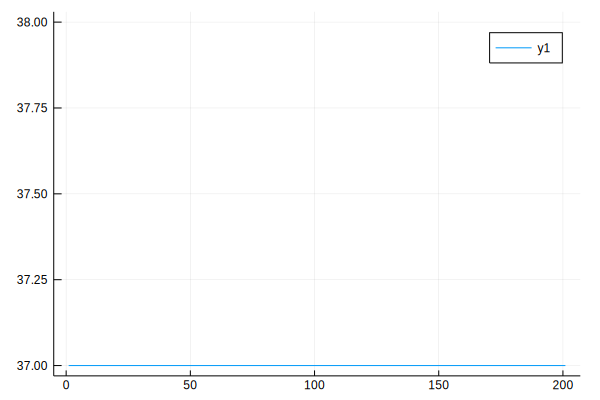

In [73]:
y = (x->x[1]).(vlst);
x = 1:length(y);

plot(x,y)

Pick up the best data.

In [74]:
v = ProcGA.penalty.(ppl)
idm = findmin(v)[2]
bestgen = ppl[idm]

10×140 Array{Int64,2}:
 0  0  0  0  0  1  0  0  7  7  7  9  9  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  7  7  7  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  7  7  7  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  7  7     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  7  7     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  2  2  2  0  0  0  5  7  7  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  2  2  2  0  0  0  0  5  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  2  2  2  0  0  0  0  0  5     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  2  2  2  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  2  2  2  0  0     0  0  0  0  0  0  0  0  0  0  0  0

In [75]:
ProcGA.penalty(bestgen)

37

In [76]:
ProcGA.dupenalty(bestgen)

0

In [77]:
ProcGA.validlength(bestgen)

37

In [78]:
ProcGA.clipjob(bestgen)

10×37 Array{Int64,2}:
 0  0  0  0  0  1  0  0  7  7  7  9  9  …   0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  1  0  7  7  7  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  1  7  7  7  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  1  0  0  7  7      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  1  0  7  7      0   0   0   0   0   0   0   0   0
 1  0  0  0  2  2  2  0  0  0  5  7  7  …  14   0   0   0   0   0   0   0   0
 0  1  0  0  2  2  2  0  0  0  0  5  0      0  14  14   0   0   0   0   0   0
 0  0  1  0  2  2  2  0  0  0  0  0  5     12   0   0  14  14   0   0   0   0
 0  0  0  1  2  2  2  0  0  0  0  0  0      0  12  12   0   0  14  14   0   0
 0  0  0  0  1  0  0  0  2  2  2  0  0      0   0   0  12  12   0   0  14  14

Unlike 10-same items, it must not be sordet by row.

In [80]:
# save best process table to file.
# do not clip it so that it can be used again
writedlm("bestprc.csv",bestgen, ',')

## Conclusion

## check functions (test)

In [ ]:
function mydupenalty(jtbl)
    p = 0
    for i in 1:ProcGA.validlength(jtbl)
        col = jtbl[:,i]
        cc = col[@. col > 0]
        cc = cc[@. ~ProcGA.isgroupable(cc)]
        cs = Set(cc)
        c = (length(cc) - length(cs))
        p += c
        if c > 0
            println("col: $i => $cc")
        end
    end
    p
end

In [ ]:
mydupenalty(gbs)

In [ ]:
gbs[:,19]

In [ ]:
col = gbs[:,10]
c = col[col .> 0 ]
c[@. ~ProcGA.isgroupable(c)]

In [14]:
ppl = ProcGA.initpopulation(200);

In [16]:
ProcGA.orderjob!.(ppl);

In [17]:
ppl[1]

10×140 Array{Int64,2}:
 1  0  0  0  0  7  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  7  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  7  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  7  0  0  0  7  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  2  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  2  2  2  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  2  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0